In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

mnist = tf.keras.datasets.mnist

In [27]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#full data classification
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
print("Mnist training shape", x_train.shape)
print("Mnist training target shape", y_train.shape)

Mnist training shape (60000, 28, 28)
Mnist training target shape (60000,)


In [29]:
x_train = x_train.reshape([-1, 28*28])
print(x_train.shape)

(60000, 784)


In [30]:
print("Mnist training shape", x_test.shape)
print("Mnist training target shape", y_test.shape)

Mnist training shape (10000, 28, 28)
Mnist training target shape (10000,)


In [31]:
x_test = x_test.reshape([-1, 28*28])
print(x_test.shape)

(10000, 784)


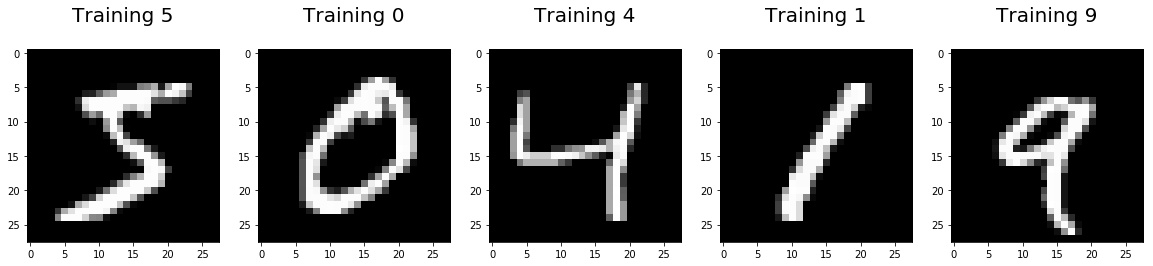

In [32]:
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title("Training %i\n" % label, fontsize=20)

# Build Logistic Regression Classifier

In [33]:
from sklearn.linear_model import LogisticRegression
#build the classifier
log = LogisticRegression()

In [34]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
print(log.predict(x_test))

[7 2 1 ... 4 5 6]


In [36]:
predByLog = log.predict(x_test)
print(predByLog[0:5])

[7 2 1 0 4]


In [37]:
print(log.predict(x_test[0].reshape(1, -1)))

[7]


In [38]:
scoreForLog = log.score(x_test, y_test)
print(scoreForLog)

0.9202


In [39]:
cmForLog = metrics.confusion_matrix(y_test, predByLog)
print(cmForLog)

[[ 960    0    1    2    0    5    6    3    1    2]
 [   0 1112    3    1    0    1    5    1   12    0]
 [   8    8  920   20    9    5   10   11   37    4]
 [   4    0   17  919    2   22    4   12   21    9]
 [   1    2    5    3  914    0   10    2    7   38]
 [  10    2    0   41   10  770   17    7   28    7]
 [   9    3    7    2    6   20  907    1    3    0]
 [   2    7   22    5    8    1    1  950    5   27]
 [  10   14    5   21   14   27    7   11  853   12]
 [   8    8    2   13   31   14    0   24   12  897]]


In [40]:
accuracyForLog = metrics.accuracy_score(y_test, predByLog)
print(accuracyForLog)

0.9202


Text(0.5,1,'Accuracy 0.9202')

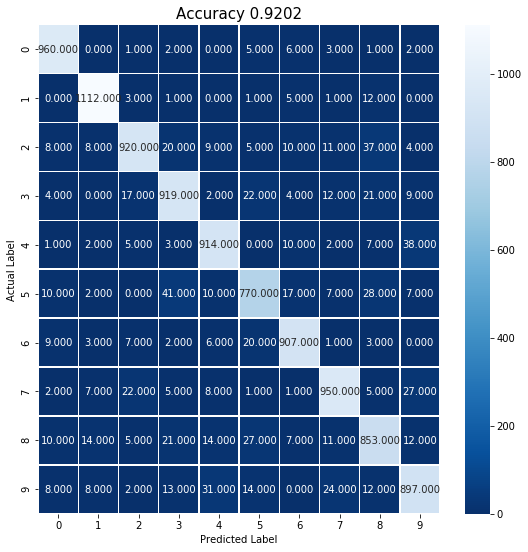

In [41]:
plt.figure(figsize=(9, 9))
#annot for labeling square in format specified by fmt
sns.heatmap(cmForLog, annot=True, fmt='.3f', linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
title = 'Accuracy {0}'.format(scoreForLog)
plt.title(title, size=15)

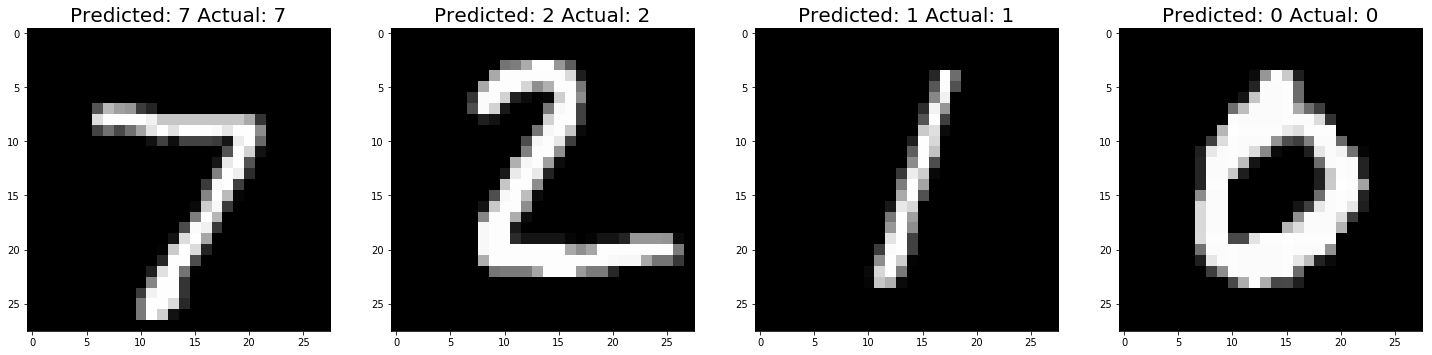

In [43]:
index = 0
classifierIndex = []

for predict, actual in zip(predByLog, y_test):
    if actual == predict:
        classifierIndex.append(index)
    index += 1
plt.figure(figsize=(25, 9))
for plotIndex, correct in enumerate(classifierIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[correct], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {} Actual: {}".format(predByLog[correct], y_test[correct]), fontsize=20)

# Build svm classifier

In [44]:
from sklearn import svm
# build the classifier
svmclassifier = svm.SVC(gamma=0.001)

In [46]:
svmclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
print(svmclassifier.predict(x_test))

[7 2 1 ... 4 5 6]


In [48]:
predBySvm = svmclassifier.predict(x_test)
print(predBySvm[0:5])

[7 2 1 0 4]


In [49]:
print(svmclassifier.predict(x_test[0].reshape(1, -1)))

[7]


In [50]:
scoreForSvm = svmclassifier.score(x_test, y_test)
print(scoreForSvm)

0.9417


In [51]:
cmForSvm = metrics.confusion_matrix(y_test, predBySvm)
print(cmForSvm)

[[ 967    0    2    0    0    5    4    1    1    0]
 [   0 1119    2    3    0    1    3    1    6    0]
 [  10    1  953    9   11    1   13   11   21    2]
 [   1    1   15  948    1   17    1   10   12    4]
 [   1    2    7    0  935    0    7    2    2   26]
 [   7    5    5   32    8  808   11    2    9    5]
 [   9    3    4    1    6   11  923    0    1    0]
 [   2   13   22    5    8    1    0  953    4   20]
 [   4    7    7   14    8   24   10    7  890    3]
 [   8    6    0   12   34    6    1   15    6  921]]


In [52]:
accuracyForSvm = metrics.accuracy_score(y_test, predBySvm)
print(accuracyForSvm)

0.9417


Text(0.5,1,'Accuracy 0.9417')

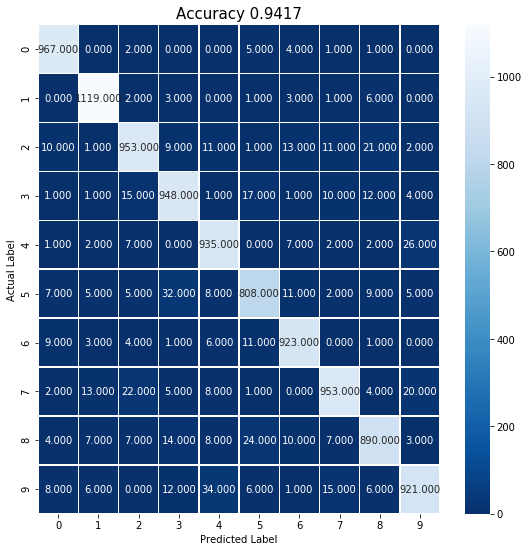

In [53]:
plt.figure(figsize=(9, 9))
#annot for labeling square in format specified by fmt
sns.heatmap(cmForSvm, annot=True, fmt='.3f', linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
title = 'Accuracy {0}'.format(scoreForSvm)
plt.title(title, size=15)

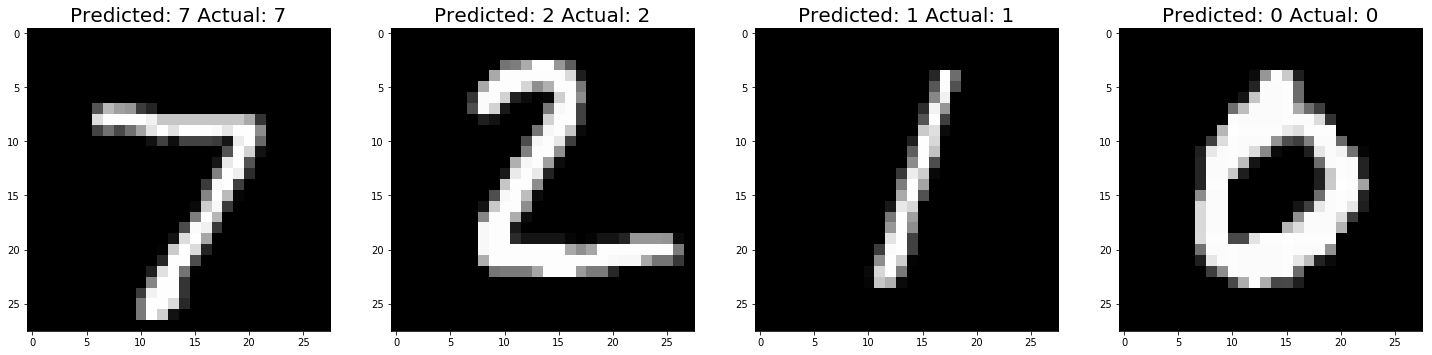

In [55]:
index = 0
classifierIndex = []

for predict, actual in zip(predBySvm, y_test):
    if actual == predict:
        classifierIndex.append(index)
    index += 1
plt.figure(figsize=(25, 9))
for plotIndex, correct in enumerate(classifierIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[correct], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {} Actual: {}".format(predBySvm[correct], y_test[correct]), fontsize=20)

# Build KNN classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
#build the classifier
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)

In [57]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
print(knn.predict(x_test))

[7 2 1 ... 4 5 6]


In [59]:
predByKnn = knn.predict(x_test)
print(predByKnn[0:5])

[7 2 1 0 4]


In [60]:
print(knn.predict(x_test[0].reshape(1, -1)))

[7]


In [61]:
scoreForKnn = knn.score(x_test, y_test)
print(scoreForKnn)

0.9688


In [62]:
cmForKnn = metrics.confusion_matrix(y_test, predByKnn)
print(cmForKnn)

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [63]:
accuracyForKnn = metrics.accuracy_score(y_test, predByKnn)
print(accuracyForKnn)

0.9688


Text(0.5,1,'Accuracy 0.9688')

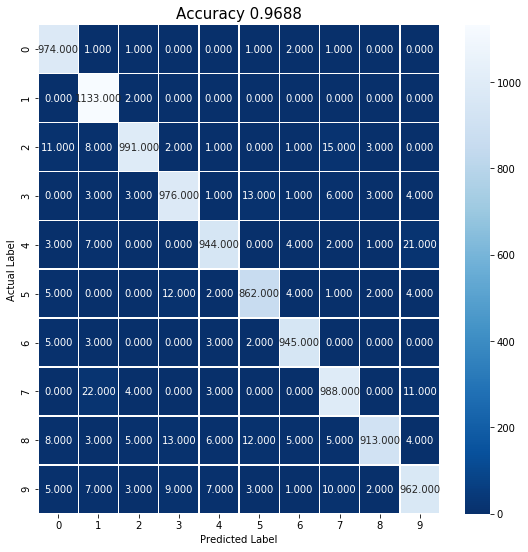

In [64]:
plt.figure(figsize=(9, 9))
#annot for labeling square in format specified by fmt
sns.heatmap(cmForKnn, annot=True, fmt='.3f', linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
title = 'Accuracy {0}'.format(scoreForKnn)
plt.title(title, size=15)

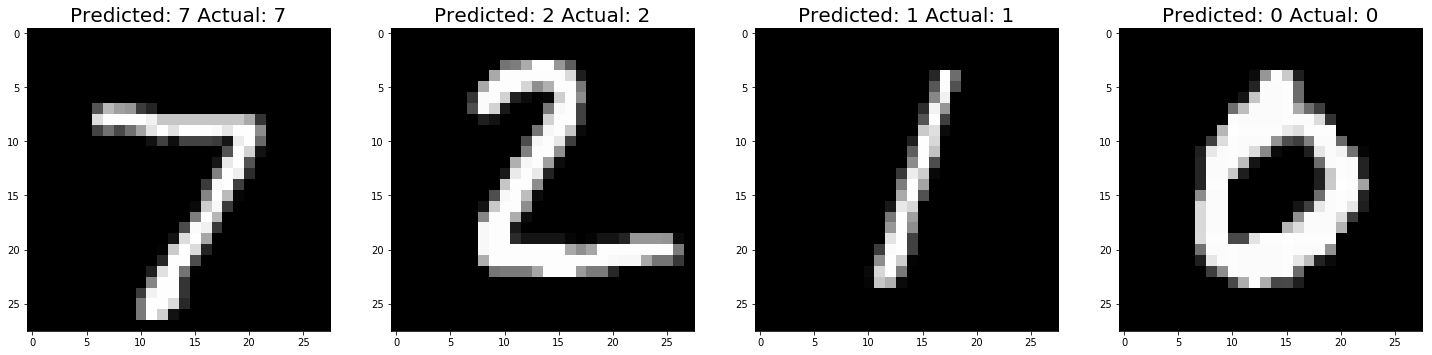

In [65]:
index = 0
classifierIndex = []

for predict, actual in zip(predByKnn, y_test):
    if actual == predict:
        classifierIndex.append(index)
    index += 1
plt.figure(figsize=(25, 9))
for plotIndex, correct in enumerate(classifierIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(x_test[correct], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {} Actual: {}".format(predByKnn[correct], y_test[correct]), fontsize=20)